In [1]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

FOLDS =10
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataC = pd.read_csv('oasis_cross-sectional.csv')

In [ ]:
# Function to graph number of people by age
def cont_age(field):
    plt.figure()
    g = None
    if field == "Age":
        df_query_mri = df[df["Age"] > 0]
        g = sns.countplot(df_query_mri["Age"])
        g.figure.set_size_inches(18.5, 10.5)
    else:
        g = sns.countplot(df[field])
        g.figure.set_size_inches(18.5, 10.5)
    
sns.despine()

<Figure size 432x288 with 0 Axes>

In [ ]:
# Function to graph number of people per state [Demented, Nondemented]
def cont_Dementes(field):
    plt.figure()
    g = None
    if field == "Group":
        df_query_mri = df[df["Group"] >= 0]
        g = sns.countplot(df_query_mri["Group"])
        g.figure.set_size_inches(18.5, 10.5)
    else:
        g = sns.countplot(df[field])
        g.figure.set_size_inches(18.5, 10.5)
    
sns.despine()

<Figure size 432x288 with 0 Axes>

In [ ]:
# 0 = F y 1= M
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

In [ ]:
def report_performance(model):

    model_test = model.predict(X_test)

    print("Confusion Matrix")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("")
    print("Classification Report")
    print(metrics.classification_report(y_test, model_test))

In [ ]:
df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
nu = pd.DataFrame(df['Group']=='Nondemented')
nu["Group"].value_counts() 

True     190
False    183
Name: Group, dtype: int64

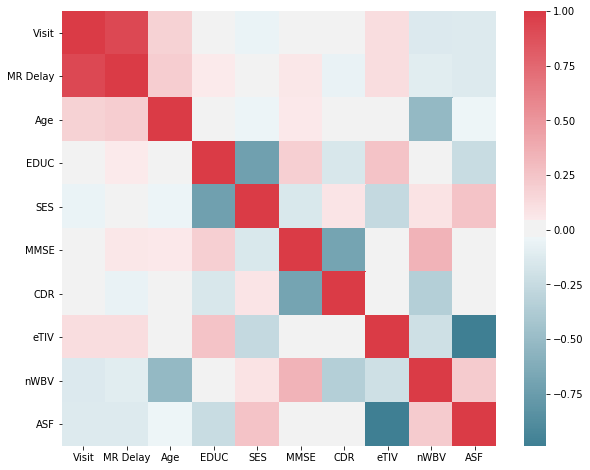

In [ ]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = df.corr(method = 'pearson') 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, ax=ax) 

In [ ]:
df.corr(method = 'pearson') 

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,1.000000,0.920009,0.183213,0.024615,-0.051622,-0.029078,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.920009,1.000000,0.205357,0.051630,-0.030813,0.065844,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.024615,0.051630,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.051622,-0.030813,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,-0.029078,0.065844,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,0.002325,-0.062915,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.117428,0.119624,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.126682,-0.105586,-0.518359,-0.012200,0.090095,0.341912,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.120399,-0.123545,-0.035067,-0.241752,0.255576,0.040052,-0.029340,-0.988877,0.213476,1.000000


In [ ]:
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

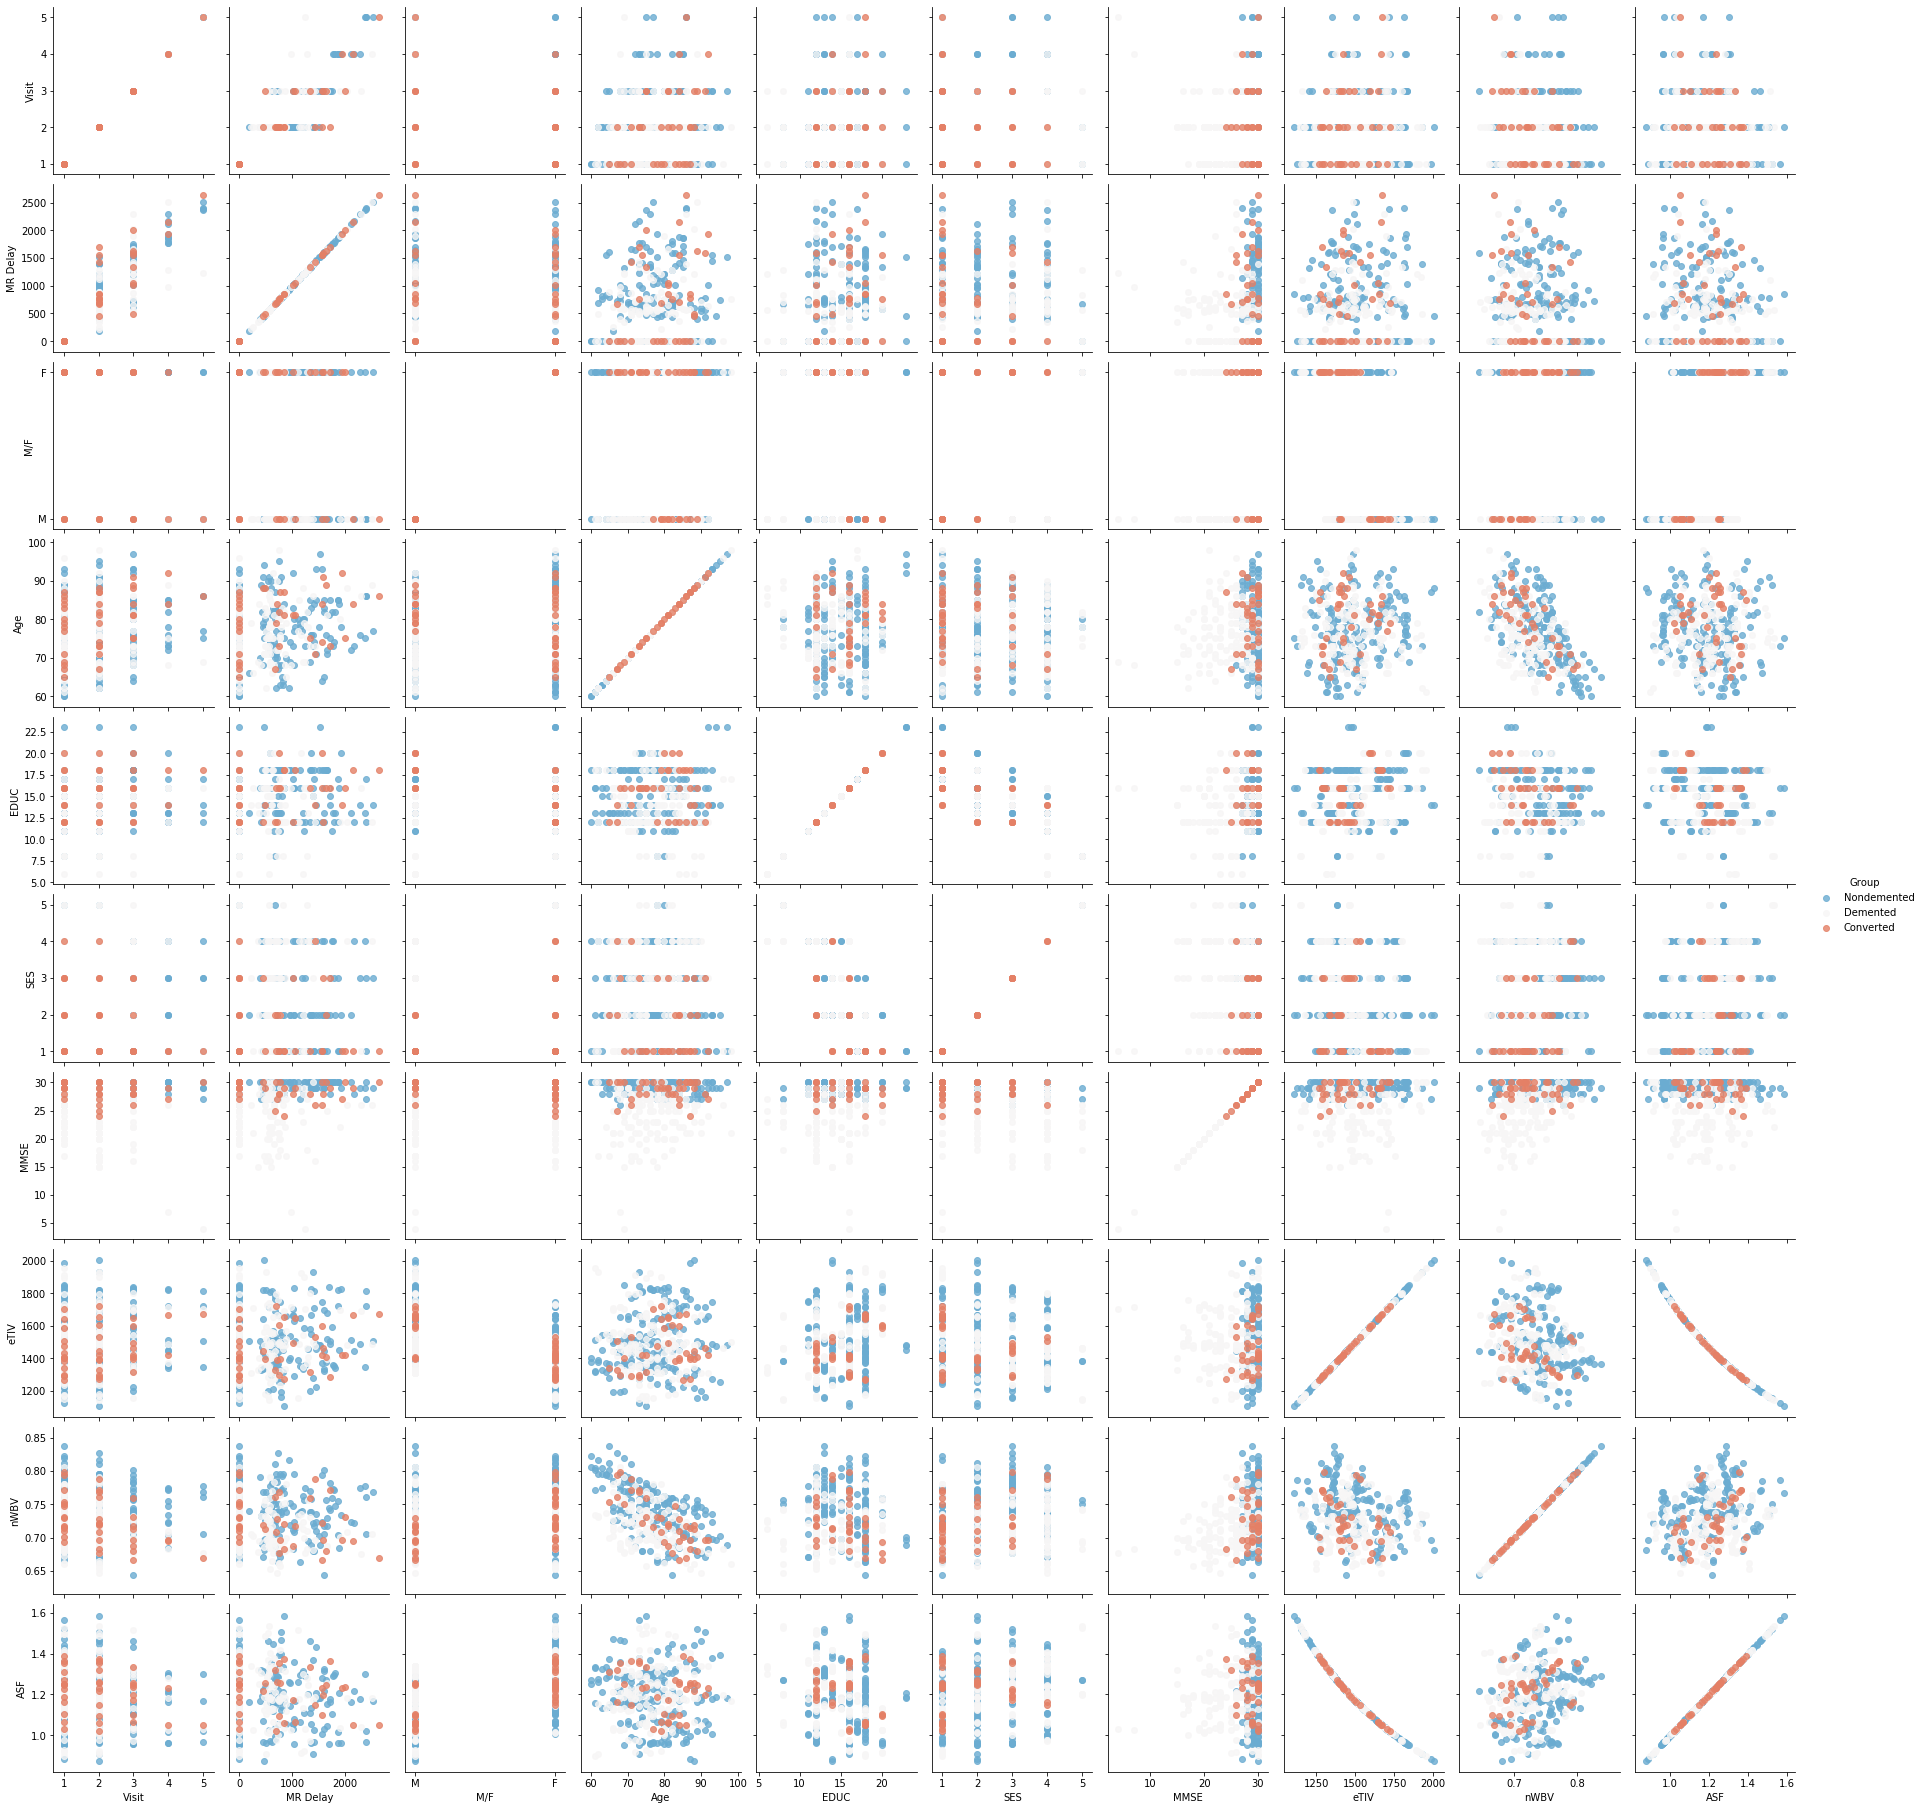

In [ ]:
g = sns.PairGrid(df, vars=['Visit','MR Delay','M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'],
                 hue='Group', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

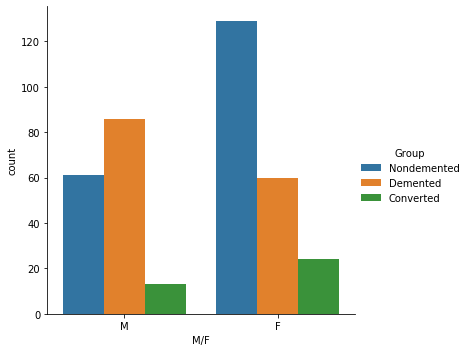

In [ ]:
import seaborn as sb
sb.catplot('M/F',data=df,hue='Group',kind="count")

(12.5, 30.0)

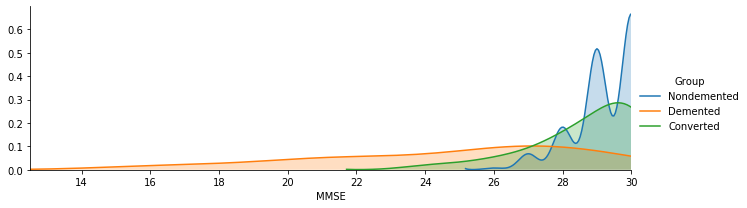

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(12.5)

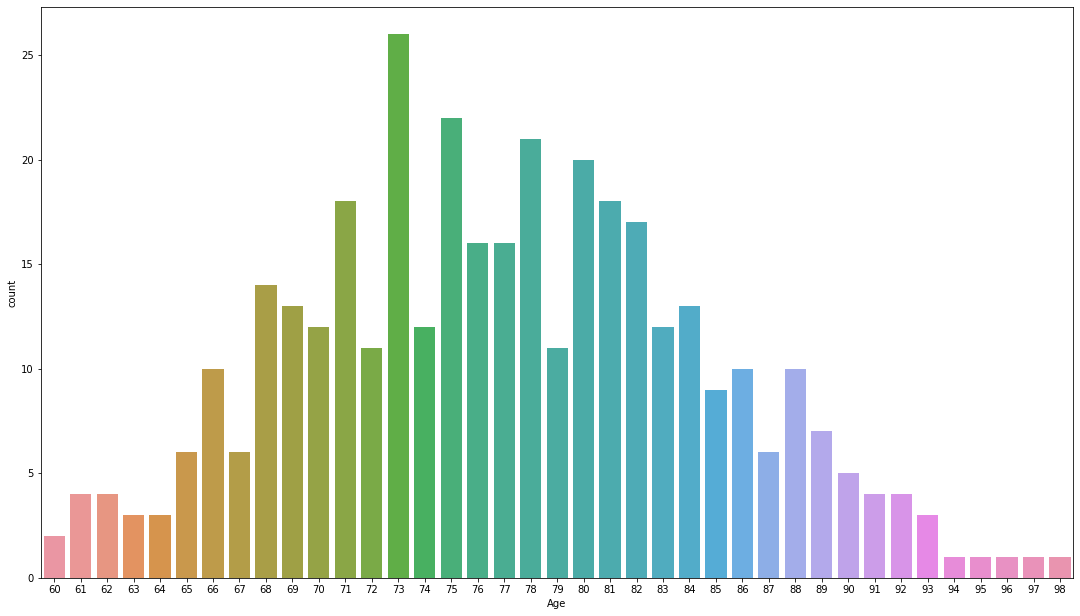

In [ ]:
cont_age("Age")

In [ ]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df.head(3)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046


In [ ]:
df.drop(['Subject ID'], axis = 1, inplace = True, errors = 'ignore')
df.drop(['MRI ID'], axis = 1, inplace = True, errors = 'ignore')
df.drop(['Visit'], axis = 1, inplace = True, errors = 'ignore')
#for this study the CDR we eliminated it
df.drop(['CDR'], axis = 1, inplace = True, errors = 'ignore')
df.head(3)

,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,Nondemented,0,M,R,87,14,2.0,27.0,1987,0.696,0.883
1,Nondemented,457,M,R,88,14,2.0,30.0,2004,0.681,0.876
2,Demented,0,M,R,75,12,NaN,23.0,1678,0.736,1.046


In [ ]:
#3.2 LabelEncoder
#We are going to use Binarized LabelEncoder for our Binary attributes**
#Which are sex and our class
# 1 = Demented, 0 = Nondemented
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])    
df.head(3)

,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,0,M,R,87,14,2.0,27.0,1987,0.696,0.883
1,0,457,M,R,88,14,2.0,30.0,2004,0.681,0.876
2,1,0,M,R,75,12,NaN,23.0,1678,0.736,1.046


In [ ]:
# 1= M, 0 = F

df['M/F'] = df['M/F'].replace(['M', 'F'], [1,0])  
df.head(3)

,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,0,1,R,87,14,2.0,27.0,1987,0.696,0.883
1,0,457,1,R,88,14,2.0,30.0,2004,0.681,0.876
2,1,0,1,R,75,12,NaN,23.0,1678,0.736,1.046


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df.Hand.values)
list(encoder.classes_)
#Transoformamos
encoder.transform(df.Hand.values)
df[['Hand']]=encoder.transform(df.Hand.values)
encoder2=LabelEncoder()
encoder2.fit(df.Hand.values)
list(encoder2.classes_)


[0]

In [ ]:
#Lost data
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Lost proportion (%)' :round(data_na,2)})
missing_data.head(20)

,Lost proportion (%)
SES,5.09
MMSE,0.54


In [ ]:
from sklearn.impute  import SimpleImputer
# We perform it with the most frequent value 
imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')

imputer.fit(df[['SES']])
df[['SES']] = imputer.fit_transform(df[['SES']])

# We perform it with the median
imputer = SimpleImputer ( missing_values = np.nan,strategy='median')

imputer.fit(df[['MMSE']])
df[['MMSE']] = imputer.fit_transform(df[['MMSE']])

In [ ]:
from sklearn.impute  import SimpleImputer
# We perform it with the median
imputer = SimpleImputer ( missing_values = np.nan,strategy='median')

imputer.fit(df[['MMSE']])
df[['MMSE']] = imputer.fit_transform(df[['MMSE']])

In [ ]:
from sklearn.preprocessing import StandardScaler
df_norm = df
scaler = StandardScaler()
df_norm[['Age','MR Delay','M/F','Hand','EDUC','SES','MMSE','eTIV','nWBV','ASF']]=scaler.fit_transform(df[['Age','MR Delay','M/F','Hand','EDUC','SES','MMSE','eTIV','nWBV','ASF']])

In [ ]:
df.drop(['Hand'], axis = 1, inplace = True, errors = 'ignore')
df.drop(['MR Delay'], axis = 1, inplace = True, errors = 'ignore')

In [ ]:
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,1.153798,1.308738,-0.208132,-0.394466,-0.095686,2.836059,-0.905169,-2.265742
1,0,1.153798,1.439787,-0.208132,-0.394466,0.721664,2.932703,-1.309643,-2.316501
2,1,1.153798,-0.263856,-0.904394,-0.394466,-1.185486,1.079409,0.173429,-1.083784
3,1,1.153798,-0.132806,-0.904394,-0.394466,0.176764,1.420506,-0.446765,-1.344830
4,1,1.153798,0.391392,-0.904394,-0.394466,-1.457936,1.193108,-0.770344,-1.170800


In [ ]:
data_test = df

In [ ]:
X = data_test.drop(["Group"],axis=1)
y = data_test["Group"].values
X.head(3)

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,1.153798,1.308738,-0.208132,-0.394466,-0.095686,2.836059,-0.905169,-2.265742
1,1.153798,1.439787,-0.208132,-0.394466,0.721664,2.932703,-1.309643,-2.316501
2,1.153798,-0.263856,-0.904394,-0.394466,-1.185486,1.079409,0.173429,-1.083784


In [ ]:
# We divide our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [ ]:
print("{0:0.2f}% Train".format((len(X_train)/len(data_test.index)) * 100))
print("{0:0.2f}% Test".format((len(X_test)/len(data_test.index)) * 100))

74.80% Train
25.20% Test


In [ ]:
print("Original Demented : {0} ({1:0.2f}%)".format(len(df_norm.loc[df_norm['Group'] == 1]), 100 * (len(df_norm.loc[df_norm['Group'] == 1]) / len(df_norm))))
print("Original Nondemented : {0} ({1:0.2f}%)".format(len(df_norm.loc[df_norm['Group'] == 0]), 100 * (len(df_norm.loc[df_norm['Group'] == 0]) / len(df_norm))))
print("")
print("Training Demented : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 100 * (len(y_train[y_train[:] == 1]) / len(y_train))))
print("Training Nondemented : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 100 * (len(y_train[y_train[:] == 0]) / len(y_train))))
print("")
print("Test Demented : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 100 * (len(y_test[y_test[:] == 1]) / len(y_test))))
print("Test Nondemented : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 100 * (len(y_test[y_test[:] == 0]) / len(y_test))))

Original Demented : 183 (49.06%)
Original Nondemented : 190 (50.94%)

Training Demented : 139 (49.82%)
Training Nondemented : 140 (50.18%)

Test Demented : 44 (46.81%)
Test Nondemented : 50 (53.19%)


In [ ]:
# Number of trees in random forest
n_estimators = range(10,250)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(1,40)
# Minimum number of samples required to split a node
min_samples_split = range(3,60)

In [ ]:
# Create the random grid
parametro_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [ ]:
model_forest = RandomForestClassifier(n_jobs=-1)
forest_random = RandomizedSearchCV(estimator = model_forest, param_distributions = parametro_rf, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_absolute_error')
forest_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.9min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
forest_random.best_params_

{'n_estimators': 243,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 21}

In [ ]:
model_rf = forest_random.best_estimator_
model_rf =  RandomForestClassifier(n_estimators=60,min_samples_split=8,max_features='sqrt',max_depth= 37)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=37, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_score = cross_val_score(model_rf, X_train, y_train, cv=FOLDS, scoring='roc_auc').mean()
test_score

0.9046703296703298

In [ ]:
test_score = cross_val_score(model_rf, X_train, y_train, cv=FOLDS, scoring='accuracy').mean()
test_score

0.8100529100529099

In [ ]:
Predicted_rf= model_rf.predict(X_test)
test_recall = recall_score(y_test, Predicted_rf, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_rf, pos_label=1)
test_auc = auc(fpr, tpr)

In [ ]:
# **** 2° Extra Tree****

In [ ]:
# Number of trees in random forest
n_estimators = range(50,280)
# Maximum number of levels in tree
max_depth =  range(1,40)
# Minimum number of samples required to split a node
min_samples_leaf = [3,4,5,6,7,8,9,10,15,20,30,40,50,60]

In [ ]:
# Create the random grid
parametro_Et = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
model_et = ExtraTreesClassifier(n_jobs=-1)
et_random = RandomizedSearchCV(estimator = model_et, param_distributions = parametro_rf, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
et_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                       

In [ ]:
et_random.best_params_

{'n_estimators': 46,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': 20}

# 3° AdaBoos


In [ ]:
n_estimators = range(10,200)

learning_rate = [0.0001, 0.001, 0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]

In [ ]:
# Create the random grid
parametros_ada = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

In [ ]:
model_ada = AdaBoostClassifier()

ada_random = RandomizedSearchCV(estimator = model_ada, param_distributions = parametros_ada, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
ada_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 0.95, 1],
                                        'n_estimators': range(10, 200)},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=2)

In [ ]:
ada_random.best_params_

{'n_estimators': 110, 'learning_rate': 0.6}

# ** 4° Gradient Boosting**

In [ ]:
parametros_gb = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.005,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_split": [0.01, 0.025, 0.005,0.4,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_leaf": [1,2,3,5,8,10,15,20,40,50,55,60,65,70,80,85,90,100],
    "max_depth":[3,5,8,10,15,20,25,30,40,50],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":range(1,100)
    }

In [ ]:
model_gb= GradientBoostingClassifier()


gb_random = RandomizedSearchCV(estimator = model_gb, param_distributions = parametros_gb, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
gb_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   30.9s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                   

In [ ]:
gb_random.best_params_

{'subsample': 0.95,
 'n_estimators': 96,
 'min_samples_split': 0.3,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 8,
 'loss': 'deviance',
 'learning_rate': 0.5,
 'criterion': 'friedman_mse'}

## Support Vector

In [ ]:
C = [0.001, 0.10, 0.1, 10, 25, 50,65,70,80,90, 100, 1000,2000,10000,20000,25000,30000,40000]

kernel =  ['rbf']
    
gamma =[1e-2, 1e-3, 1e-4, 1e-5,1e-6,1e-7,1e-8,1]

In [ ]:
# Create the random grid
parametros_svm = {'C': C,
            'gamma': gamma,
             'kernel': kernel}

In [ ]:
model_svm = SVC()
from sklearn.model_selection import GridSearchCV
svm_random = GridSearchCV(model_svm, parametros_svm,  cv = 20, 
                               verbose=2, n_jobs = -1, scoring='roc_auc')
svm_random.fit(X, y)

Fitting 20 folds for each of 144 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   31.9s finished


GridSearchCV(cv=20, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.1, 10, 25, 50, 65, 70, 80, 90, 100,
                               1000, 2000, 10000, 20000, 25000, 30000, 40000],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07,
                                   1e-08, 1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

## 6 xgboost

In [ ]:
param_xgb = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [50,100,120]}

In [ ]:
from sklearn.model_selection import GridSearchCV

model_xgb = xgb.XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = model_xgb, param_distributions = param_xgb, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
xgb_random.fit(X_train.values, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.2s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                          

In [ ]:
xgb_random.best_params_

{'subsample': 0.6,
 'silent': False,
 'reg_lambda': 5.0,
 'n_estimators': 100,
 'min_child_weight': 1.0,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.25,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.8}

## Selected params

In [ ]:
parametro_rf = forest_random.best_params_

parametro_et = et_random.best_params_

parametro_ada = ada_random.best_params_

parametro_gb = gb_random.best_params_

parametro_svm = svm_random.best_params_

parametro_xgb= xgb_random.best_params_


## Generating models

Sklearn library

1. random forest sorter
2. AdaBoost classifier.
3. Gradient Boosting classifer
4. Support vector machine
5. Extra Trees

In [ ]:
model_rf = forest_random.best_estimator_

model_et = et_random.best_estimator_

model_ada = ada_random.best_estimator_

model_gb = gb_random.best_estimator_

model_svc = svm_random.best_estimator_

model_xgb= xgb_random.best_estimator_


# Cross Validation

In [ ]:
kf = KFold(n_splits=FOLDS, random_state = 0, shuffle = True)
for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    Xtrain, Xval = X_train.values[train_index], X_train.values[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]
    
    model_rf.fit(Xtrain, ytrain)
    model_et.fit(Xtrain, ytrain)
    model_ada.fit(Xtrain, ytrain)
    model_gb.fit(Xtrain, ytrain)
    model_svc.fit(Xtrain, ytrain)
    model_xgb.fit(Xtrain, ytrain)
    

# Importance of characteristics 


In [ ]:
rf_feature = model_rf.feature_importances_
ada_feature = model_ada.feature_importances_
gb_feature = model_gb.feature_importances_
et_feature = model_et.feature_importances_
xbg_feature = model_xgb.feature_importances_

In [ ]:
cols = X.columns.tolist()
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_feature,
      'AdaBoost feature importances': ada_feature,
    'Gradient Boost feature importances': gb_feature,
    'Extra Trees  feature importances': et_feature,
    'Xgboost feature importances': xbg_feature,
    })

In [ ]:
xbg_feature

array([0.10794422, 0.07331441, 0.10115752, 0.0974373 , 0.31502002,
       0.09022283, 0.13578208, 0.07912164], dtype=float32)

## Graphics:

In [ ]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

trace = go.Scatter(
    y = feature_dataframe['Xgboost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Xgboost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'XgboostFeature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


In [ ]:
# Create the new column that contains the average of the values.
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,features,Random Forest feature importances,AdaBoost feature importances,Gradient Boost feature importances,Extra Trees feature importances,Xgboost feature importances,mean
0,M/F,0.048129,0.054545,0.072307,0.064045,0.107944,0.069394
1,Age,0.091489,0.109091,0.075077,0.093412,0.073314,0.088476
2,EDUC,0.089194,0.072727,0.131518,0.121389,0.101158,0.103197


In [ ]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

# Predictions

In [ ]:
Predicted_rf= model_rf.predict(X_test)
Predicted_ada = model_ada.predict(X_test)
Predicted_gb = model_gb.predict(X_test)
Predicted_et = model_et.predict(X_test)
Predicted_svm= model_svc.predict(X_test)
Predicted_xgb= model_xgb.predict(X_test.values)

In [ ]:
base_predictions_train = pd.DataFrame( {'RandomForest': Predicted_rf.ravel(),
      'AdaBoost': Predicted_ada.ravel(),
      'GradientBoost': Predicted_gb.ravel(),
      'ExtraTrees': Predicted_et.ravel(),
      'SVM': Predicted_svm.ravel(),
      'XGB': Predicted_xgb.ravel(),
     'Real value': y_test                                
                                        
    })
base_predictions_train.head(10)

,RandomForest,AdaBoost,GradientBoost,ExtraTrees,SVM,XGB,Real value
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0
3,0,1,0,0,1,1,1
4,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1
6,0,1,0,0,0,0,0
7,1,1,1,1,1,1,1
8,1,0,1,1,0,0,1
9,1,1,0,1,1,1,1


# Performance Metric for each model

In [ ]:
acc = [] # list to store all performance metric

In [ ]:
model='Random Forest'
test_score = cross_val_score(model_rf, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_rf, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_rf, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model,test_score, test_recall, test_auc, fpr, tpr, thresholds])

model='AdaBoost'
test_score = cross_val_score(model_ada, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_ada, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_ada, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model, test_score,test_recall, test_auc, fpr, tpr, thresholds])

model='Gradient Boosting'
test_score = cross_val_score(model_gb, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_gb, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_gb, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model, test_score,test_recall, test_auc, fpr, tpr, thresholds])

model='ExtraTrees'
test_score = cross_val_score(model_et, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_et, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_et, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model, test_score, test_recall, test_auc, fpr, tpr, thresholds])

model='SVM'
test_score = cross_val_score(model_svc, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_svm, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_svm, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model, test_score, test_recall, test_auc, fpr, tpr, thresholds])

model='Xgboost'
test_score = cross_val_score(model_xgb, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_xgb, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_xgb, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model,test_score, test_recall, test_auc, fpr, tpr, thresholds])


## Report 

for the Extra Trees model


In [ ]:
report_performance(model_et)

Confusion Matrix
[[40 10]
 [ 5 39]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        50
           1       0.80      0.89      0.84        44

    accuracy                           0.84        94
   macro avg       0.84      0.84      0.84        94
weighted avg       0.85      0.84      0.84        94



## Results

In [ ]:
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Random Forest,0.820767,0.818182,0.789091
1,AdaBoost,0.813757,0.795455,0.727727
2,Gradient Boosting,0.827910,0.886364,0.823182
3,ExtraTrees,0.860317,0.886364,0.843182
4,SVM,0.792063,0.818182,0.799091
5,Xgboost,0.802910,0.818182,0.789091


# Layers for the model

In [ ]:
class ReLULayer:
    def _init_(self, name='ReLU'):
        pass

    def forward(self, in_data):
        self.top_val = in_data
        ret = in_data.copy()
        ret[ret < 0] = 0
        return ret
    def backward(self, residual):
        gradient_x = residual.copy()
        gradient_x[self.top_val < 0] = 0
        return gradient_x

In [ ]:
class MaxPoolingLayer:
    def _init_(self, kernel_size, name='MaxPool'):
        self.kernel_size = kernel_size

    def forward(self, in_data):
        in_batch, in_channel, in_row, in_col = in_data.shape
        k = self.kernel_size
        out_row = in_row / k + (1 if in_row % k != 0 else 0)
        out_col = in_col / k + (1 if in_col % k != 0 else 0)

        self.flag = np.zeros_like(in_data)
        ret = np.empty((in_batch, in_channel, out_row, out_col))
        for b_id in range(in_batch):
            for c in range(in_channel):
                for oy in range(out_row):
                    for ox in range(out_col):
                        height = k if (oy + 1) * k <= in_row else in_row - oy * k
                        width = k if (ox + 1) * k <= in_col else in_col - ox * k
                        idx = np.argmax(in_data[b_id, c, oy * k: oy * k + height, ox * k: ox * k + width])
                        offset_r = idx / width
                        offset_c = idx % width
                        self.flag[b_id, c, oy * k + offset_r, ox * k + offset_c] = 1
                        ret[b_id, c, oy, ox] = in_data[b_id, c, oy * k + offset_r, ox * k + offset_c]
        return ret
    def backward(self, residual):
        in_batch, in_channel, in_row, in_col = self.flag
        k = self.kernel_size
        out_row, out_col = residual.shape[2], residual.shape[3]

        gradient_x = np.zeros_like(self.flag)
        for b_id in range(in_batch):
            for c in range(in_channel):
                for oy in range(out_row):
                    for ox in range(out_col):
                        height = k if (oy + 1) * k <= in_row else in_row - oy * k
                        width = k if (ox + 1) * k <= in_col else in_col - ox * k
                        gradient_x[b_id, c, oy * k + offset_r, ox * k + offset_c] = residual[b_id, c, oy, ox]
        gradient_x[self.flag == 0] = 0
        return gradient_x

In [ ]:
class ConvolutionalLayer: # el error me sale en esta clase pero no se si hay en otros
    def _init_(self, in_channel, out_channel, kernel_size, lr=0.01, momentum=0.9, name='Conv'):
        self.w = np.random.randn(in_channel, out_channel, kernel_size, kernel_size)
        self.b = np.zeros((out_channel))
        self.layer_name = name
        self.lr = lr
        self.momentum = momentum

        self.prev_gradient_w = np.zeros_like(self.w)
        self.prev_gradient_b = np.zeros_like(self.b)

    def forward(self, in_data):
        # assume the first index is channel index
        print ('conv forward:' + str(in_data.shape)
        in_batch,in_channel, in_row, in_col = in_data.shape
        out_channel, kernel_size = self.w.shape[1], self.w.shape[2]
        self.top_val = np.zeros((in_batch, out_channel, in_row - kernel_size + 1, in_col - kernel_size + 1))
        self.bottom_val = in_data

        for b_id in range(in_batch):
            for o in range(out_channel):
                for i in range(in_channel):
                    self.top_val[b_id, o] += conv2(in_data[b_id, i], self.w[i, o])
                self.top_val[b_id, o] += self.b[o]
        return self.top_val

    def backward(self, residual):
        in_channel, out_channel, kernel_size = self.w.shape
        in_batch = residual.shape[0]
        # gradient_b
        self.gradient_b = residual.sum(axis=3).sum(axis=2).sum(axis=0) / self.batch_size
        # gradient_w
        self.gradient_w = np.zeros_like(self.w)
        for b_id in range(in_batch):
            for i in range(in_channel):
                for o in range(out_channel):
                    self.gradient_w[i, o] += conv2(self.bottom_val[b_id], residual[o])
        self.gradient_w /= self.batch_size
        # gradient_x
        gradient_x = np.zeros_like(self.bottom_val)
        for b_id in range(in_batch):
            for i in range(in_channel):
                for o in range(out_channel):
                    gradient_x[b_id, i] += conv2(padding(residual, kernel_size - 1), rot180(self.w[i, o]))
        gradient_x /= self.batch_size
        # update
        self.prev_gradient_w = self.prev_gradient_w * self.momentum - self.gradient_w
        self.w += self.lr * self.prev_gradient_w
        self.prev_gradient_b = self.prev_gradient_b * self.momentum - self.gradient_b
        self.b += self.lr * self.prev_gradient_b
        return gradient_x

class FCLayer:
    def _init_(self, in_num, out_num, lr = 0.01, momentum=0.9):
        self._in_num = in_num
        self._out_num = out_num
        self.w = np.random.randn(in_num, out_num)
        self.b = np.zeros((out_num, 1))
        self.lr = lr
        self.momentum = momentum
        self.prev_grad_w = np.zeros_like(self.w)
        self.prev_grad_b = np.zeros_like(self.b)
    def forward(self, in_data):
        print 'fc forward=' + str(in_data.shape)
        self.topVal = np.dot(self.w.T, in_data) + self.b
        self.bottomVal = in_data
        return self.topVal
    def backward(self, loss):
        batch_size = loss.shape[0]

        # residual_z = loss * self.topVal * (1 - self.topVal)
        grad_w = np.dot(self.bottomVal, loss.T) / batch_size
        grad_b = np.sum(loss) / batch_size
        residual_x = np.dot(self.w, loss)
        self.prev_grad_w = self.prev_grad_w * momentum - grad_w
        self.prev_grad_b = self.prev_grad_b * momentum - grad_b
        self.w -= self.lr * self.prev_grad_w
        self.b -= self.lr * self.prev_grad_b
        return residual_x

SyntaxError: invalid syntax (<ipython-input-84-dc043427a2ec>, line 15)

In [ ]:
class FlattenLayer:
    def _init_(self, name='Flatten'):
        pass
    def forward(self, in_data):
        self.in_batch, self.in_channel, self.r, self.c = in_data.shape
        return in_data.reshape(self.in_batch, self.in_channel * self.r * self.c)
    def backward(self, residual):
        return residual.reshape(self.in_batch, self.in_channel, self.r, self.c)

class SoftmaxLayer:
    def _init_(self, name='Softmax'):
        pass
    def forward(self, in_data):
        exp_out = np.exp(in_data)
        self.top_val = exp_out / np.sum(exp_out, axis=1)
        return self.top_val
    def backward(self, residual):
        return self.top_val - residual

class Net:
    def _init_(self):
        self.layers = []
    def addLayer(self, layer):
        self.layers.append(layer)
    def train(self, trainData, trainLabel, validData, validLabel, batch_size, iteration):
        train_num = trainData.shape[0]
        for iter in range(iteration):
            print ('iter=' + str(iter))
            for batch_iter in range(0, train_num, batch_size):
                print('batch_iter=', batch_iter)
                if batch_iter + batch_size < train_num:
                    self.train_inner(trainData[batch_iter: batch_iter + batch_size],
                        trainLabel[batch_iter: batch_iter + batch_size])
                else:
                    self.train_inner(trainData[batch_iter: train_num],
                        trainLabel[batch_iter: train_num])
            print ("eval=" + str(self.eval(validData, validLabel)))
    def train_inner(self, data, label):
        lay_num = len(self.layers)
        in_data = data

        for i in range(lay_num):
            out_data = self.layers[i].forward(in_data)
            in_data = out_data

        residual_in = label
        for i in range(0, lay_num, -1):
            residual_out = self.layers[i].backward(residual_in)
            residual_in = residual_out
    def eval(self, data, label):
        lay_num = len(self.layers)
        in_data = data
        for i in range(lay_num):
            out_data = self.layers[i].forward(in_data)
            in_data = out_data
        out_idx = np.argmax(in_data, axis=1)
        label_idx = np.argmax(label, axis=1)
        return np.sum(out_idx == label_idx) / float(out_idx.shape[0])